   # Chapter 7 Multivariate Analysis

In [1]:
import copy
import japanize_matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib.pyplot import imshow
from numpy.random import randn
from scipy import stats

C:\Users\prof-\anaconda3\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


## 7.1 Principle Component Analysis (1): SCoTLASS

In [2]:
import copy as c

In [3]:
def soft_th(lambd, x):
    return np.sign(x) * np.maximum(np.abs(x) - lambd, 0)
def SCoTLASS(lambd, X):
    n = X.shape[0]; p = X.shape[1]
    v = np.random.normal(size=p); v = v / np.linalg.norm(v, 2)
    for k in range(200):
        u = np.dot(X, v); u = u / np.linalg.norm(u, 2); v = np.dot(X.T, u)
        v = soft_th(lambd, v); size = np.linalg.norm(v, 2)
        if size > 0: v = v / size
        else: break
    if np.linalg.norm(v, 2) == 0: print("All the elements of v becomes zero.")
    return v

In [4]:
# Data Generation
n = 100; p = 50
X = np.random.normal(size=n*p).reshape(n, -1); lambd_seq = np.arange(0, 11) / 10
m = 5; SS = np.zeros((m, 11)); TT = np.zeros((m, 11))
for j in range(m):
    S = list(); T = list()
    for lambd in lambd_seq:
        v = SCoTLASS(lambd, X)
        S.append(sum(np.sign(v**2))); T.append(np.linalg.norm(np.dot(X, v), 2))
    SS[j, :] = S; TT[j, :] = T

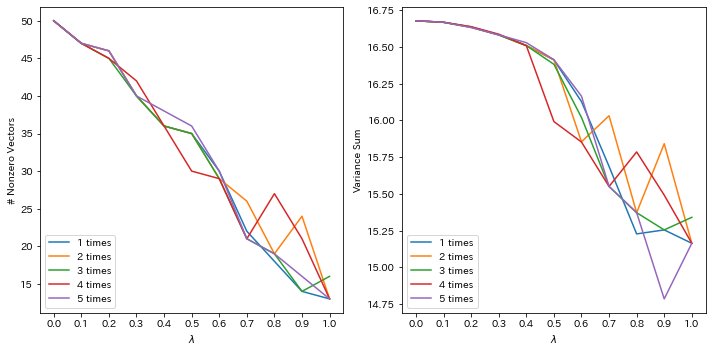

In [7]:
fig = plt.figure(figsize=(10, 5))
cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
# # of Nonzero Vectors
plt.subplot(1, 2, 1)
plt.xticks(lambd_seq)
plt.xlabel(r"$\lambda$"); plt.ylabel("# Nonzero Vectors")
for j in range(m):
    plt.plot(lambd_seq, SS[j, :], color=cycle[j], linestyle="-", label="%d times" % (j+1))
plt.legend(loc="lower left")
# Variance Sum
plt.subplot(1, 2, 2)
plt.xticks(lambd_seq)
plt.xlabel(r"$\lambda$"); plt.ylabel("Variance Sum")
for j in range(m):
    plt.plot(lambd_seq, TT[j, :], color=cycle[j], linestyle="-", label="%d times" % (j+1))
plt.legend(loc="lower left")
plt.tight_layout()  # Avoid Overlap

## 7.2 Principle Component Analysis (2): SPCA  

In [8]:
# Data Generation
n = 100; p = 5; x = np.random.normal(size=n*p).reshape(-1, p)
lambd_seq = np.arange(0, 11) / 10
lambd = [0.00001, 0.001]; m = 100; g = np.zeros((m, p))
# Graph Display
g_max = np.max(g); g_min = np.min(g)
fig = plt.figure(figsize=(10, 5))
cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

<Figure size 720x360 with 0 Axes>

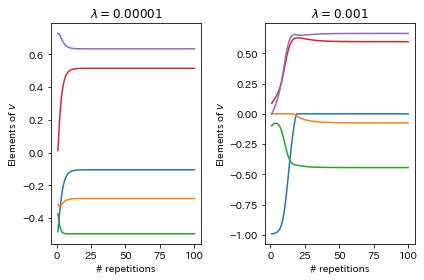

In [9]:
# lambda = 0.00001
# Computation of u,v
for j in range(p): x[:, j] = x[:, j] - np.mean(x[:, j])
for j in range(p): x[:, j] = x[:, j] / np.sqrt(np.sum(np.square(x[:, j])))
r = [0] * n; v = np.random.normal(size=p)
for h in range(m):
    z = np.dot(x, v); u = np.dot(x.T, z)
    if np.sum(np.square(u)) > 0.00001: u = u / np.sqrt(np.sum(np.square(u)))
    for k in range(p):
        m1 = list(np.arange(k)); n1 = list(np.arange(k+1, p)); z = m1 + n1
        for i in range(n):
            r[i] = np.sum(u * x[i, :]) - np.sum(np.square(u)) * sum(x[i, z] * v[z])
        S = np.sum(np.dot(x[:, k], r)) / n
        v[k] = soft_th(lambd[0], S)
    if np.sum(np.square(v)) > 0.00001: v = v / np.sqrt(np.sum(np.square(v)))
    g[h, :] = v
# Making a graph
plt.subplot(1, 2, 1)
plt.title(r"$\lambda = 0.00001$")
plt.xlabel("# repetitions"); plt.ylabel("Elements of $v$")
for j in range(p):
    plt.plot(range(1, m+1), g[:, j], color=cycle[j])

# lambda = 0.001
# Computation of u,v
for j in range(p): x[:, j] = x[:, j] - np.mean(x[:, j])
for j in range(p): x[:, j] = x[:, j] / np.sqrt(np.sum(np.square(x[:, j])))
r = [0] * n; v = np.random.normal(size=p)
for h in range(m):
    z = np.dot(x, v); u = np.dot(x.T, z)
    if np.sum(np.square(u)) > 0.00001: u = u / np.sqrt(np.sum(np.square(u)))
    for k in range(p):
        m1 = list(np.arange(k)); n1 = list(np.arange(k+1, p)); z = m1 + n1
        for i in range(n):
            r[i] = np.sum(u * x[i, :]) - np.sum(np.square(u)) * sum(x[i, z] * v[z])
        S = np.sum(np.dot(x[:, k], r)) / n
        v[k] = soft_th(lambd[1], S)
    if np.sum(np.square(v)) > 0.00001: v = v / np.sqrt(np.sum(np.square(v)))
    g[h, :] = v
# Making a graph
plt.subplot(1, 2, 2)
plt.title(r"$\lambda = 0.001$")
plt.xlabel("# repetitions"); plt.ylabel("Elements of $v$")
for j in range(p):
    plt.plot(range(1, m+1), g[:, j], color=cycle[j])
plt.tight_layout()  # Avoid Overlap

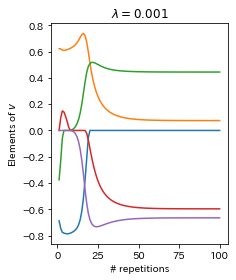

In [10]:
# lambda = 0.001
# Computation of u,v
for j in range(p): x[:, j] = x[:, j] - np.mean(x[:, j])
for j in range(p): x[:, j] = x[:, j] / np.sqrt(np.sum(np.square(x[:, j])))
r = [0] * n; v = np.random.normal(size=p)
for h in range(m):
    z = np.dot(x, v); u = np.dot(x.T, z)
    if np.sum(np.square(u)) > 0.00001: u = u / np.sqrt(np.sum(np.square(u)))
    for k in range(p):
        m1 = list(np.arange(k)); n1 = list(np.arange(k+1, p)); z = m1 + n1
        for i in range(n):
            r[i] = np.sum(u * x[i, :]) - np.sum(np.square(u)) * sum(x[i, z] * v[z])
        S = np.sum(np.dot(x[:, k], r)) / n
        v[k] = soft_th(lambd[1], S)
    if np.sum(np.square(v)) > 0.00001: v = v / np.sqrt(np.sum(np.square(v)))
    g[h, :] = v
# Making a graph
plt.subplot(1, 2, 2)
plt.title(r"$\lambda = 0.001$")
plt.xlabel("# repetitions"); plt.ylabel("Elements of $v$")
for j in range(p):
    plt.plot(range(1, m+1), g[:, j], color=cycle[j])
plt.tight_layout()  # Avoid Overlap

## 7.3 K-means Clustering

In [11]:
def kmeans(X, K, w):
    n = X.shape[0]; p = X.shape[1]
    y = np.random.choice(range(1, K+1), n, replace=True); center = np.zeros((K, p))
    for h in range(10):
        for k in range(K):
            if np.sum(y == (k+1)) == 0: center[k, :] = np.inf
            else:
                for j in range(p): center[k, j] = np.mean(X[np.where(y == (k+1)), j])
        for i in range(n):
            S_min = np.inf
            for k in range(K):
                if center[k, 1] == np.inf: break
                S = np.sum(np.square(X[i, :] - center[k, :]) * w)
                if S < S_min: S_min = S; y[i] = k + 1
    return y

Text(0, 0.5, '$y$')

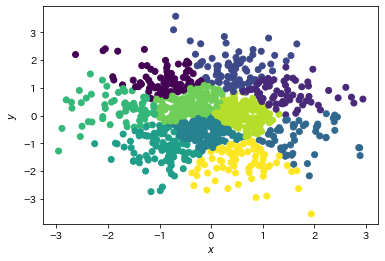

In [12]:
# Data Generation
K = 10; p = 2; n = 1000; X = np.random.normal(size=(n, p))
w = [1, 1]; y = kmeans(X, K, w)
# Output
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xticks(range(-3, 4)); plt.yticks(range(-3, 4))
plt.xlabel("$x$"); plt.ylabel("$y$")

In [13]:
def w_a(a, s):
    p = len(a); w = [1] * p; a = a / np.sqrt(sum(np.square(a)))
    if sum(a) < s: return a
    lambd = max(a) / 2; delta = lambd / 2
    for h in range(10):
        for j in range(p): w[j] = soft_th(lambd, a[j])
        ww = np.sqrt(sum(np.array(w) ** 2))
        if ww == 0: w = 0
        else: w = w / ww
        if np.sum(w) > s: lambd = lambd + delta
        else: lambd = lambd - delta
        delta = delta / 2
    return w

In [14]:
def comp_a(X, y):
    n = X.shape[0]; p = X.shape[1]; a = np.zeros(p)
    for j in range(p):
        a[j] = 0
        for i in range(n):
            for h in range(n): a[j] = a[j] + np.square(X[i, j] - X[h, j]) / n
        for k in range(K):
            S = 0
            index = np.where(y == k)
            if len(index[0]) == 0: break
            for i in index[0]:
                for h in index: S = S + np.square(X[i, j] - X[h, j])
                a[j] = a[j] - S / len(index[0])
    return a

In [15]:
def sparse_kmeans(X, K, s):
    p = X.shape[1]; w = [1] * p
    for h in range(10):
        y = kmeans(X, K, w)
        a = comp_a(X, y)
        w = w_a(a, s)
    return {'w': w, 'y': y}

In [16]:
p = 10; n = 100; X = np.random.normal(size=(n, p))
sparse_kmeans(X, 5, 1.5)

{'w': array([0.        , 0.        , 0.1021315 , 0.        , 0.        ,
        0.77245104, 0.        , 0.        , 0.62680823, 0.        ]),
 'y': array([1, 3, 1, 2, 5, 3, 5, 5, 1, 4, 3, 4, 1, 3, 3, 1, 3, 2, 3, 3, 1, 4,
        3, 2, 1, 5, 3, 5, 3, 5, 4, 4, 3, 4, 4, 5, 3, 5, 5, 1, 1, 3, 5, 3,
        5, 2, 4, 1, 1, 1, 3, 4, 5, 3, 4, 1, 3, 4, 3, 1, 3, 5, 4, 3, 5, 2,
        3, 4, 3, 3, 2, 5, 5, 5, 2, 2, 3, 5, 2, 3, 3, 3, 3, 5, 5, 2, 5, 3,
        5, 3, 2, 1, 1, 1, 5, 3, 5, 3, 3, 5])}

## 7.4 Convex Clustering

In [36]:
# Compute weight
def ww(x, mu=1, dd=0):
    n = x.shape[0]; w = np.zeros((n, n))
    for i in range(n):
        for j in range(n): w[i, j] = np.exp(-mu * sum(np.square(x[i, :] - x[j, :])))
    if dd > 0:
        for i in range(n):
            dis = list()
            for j in range(n): dis.append(np.sqrt(np.square(sum(x[i, :] - x[j, :]))))
            index = np.where(np.array(dis) > dd)[0]
            w[i, index] = 0
    return w

In [37]:
# L2 prox （Group Lasso）
def prox(x, tau):
    if sum(np.square(x)) == 0: return x
    else:
        return np.maximum(np.array([0]), 1 - tau / np.sqrt(sum(np.square(x)))) * x

In [38]:
# Update u
def update_u(v, lambd):
    u = np.zeros((n, d))
    z = 0; m = c.deepcopy(x)
    for i in range(n): z = z + m[i, :]
    y = c.deepcopy(x)
    for i in range(n):
        if i < n - 1:
            for j in range(i + 1, n): y[i, :] = y[i, :] + lambd[i, j, :] + nu * v[i, j, :]
        if 0 < i:
            for j in range(i - 1): y[i, :] = y[i, :] - lambd[j, i, :] - nu * v[j, i, :]
        u[i, :] = (y[i, :] + nu * z) / (n * nu + 1)
    return u

In [39]:
# Update v
def update_v(u, lambd):
    v = np.zeros((n, n, d))
    for i in range(n - 1):
        for j in range(i + 1, n):
            v[i, j, :] = prox(u[i, :] - u[j, :] - lambd[i, j, :] / nu,
                              gamma * w[i, j] / nu)
    return v

In [40]:
# Update lambda
def update_lambda(u, v, lambd):
    for i in range(n-1):
        for j in range(i + 1, n):
            lambd[i, j, :] = lambd[i, j, :] + nu * (v[i, j, :] - u[i, :] + u[j, :])
    return lambd

In [41]:
# Repeat the max_iter times updates of u,v,lambda
def convex_cluster():
    v = np.random.normal(size=(n, n, d))
    lambd = np.random.normal(size=(n, n, d))
    for iter in range(max_iter):
        u = update_u(v, lambd)
        v = update_v(u, lambd)
        lambd = update_lambda(u, v, lambd)
    return {"u": u, "v": v}

[1, 2, 3, 4, 3, 3, 5, 6, 3, 3, 3, 7, 4, 7, 6, 3, 8, 6, 6, 9, 3, 7, 10, 10, 10, 3, 11, 3, 10, 3, 12, 13, 10, 5, 6, 14, 15, 3, 10, 10, 10, 3, 3, 16, 17, 3, 3, 5, 3, 7]


Text(0, 0.5, 'Second')

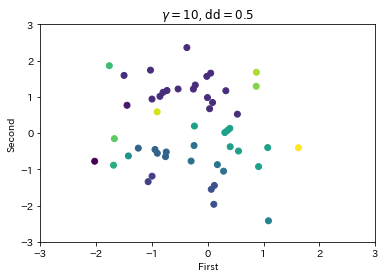

In [42]:
# Data Generation
n = 50; d = 2; x = np.random.normal(size=(n, d))
# Convex Clustering
w = ww(x, 1, dd=0.5); gamma = 1  # gamma = 10
nu = 1; max_iter = 1000; v = convex_cluster()["v"]
# Adj Matrix
a = np.zeros((n, n))
for i in range(n-1):
    for j in range(i + 1, n):
        if np.sqrt(sum(np.square(v[i, j, :]))) < 1 / 10 ** 4:
            a[i, j] = 1; a[j, i] = 1
# Making a graph
k = 0; y = [0] * n
for i in range(n):
    if y[i] == 0:
        k = k + 1; y[i] = k
        if i < n - 1:
            for j in range(i+1, n):
                if a[i, j] == 1: y[j] = k
print(y)
plt.scatter(x=x[:, 0], y=x[:, 1], c=y)
plt.xticks(range(-3, 4)); plt.yticks(range(-3, 4))
plt.title(r"$\gamma = 10$, $\mathrm{dd} = 0.5$")
plt.xlabel("First"); plt.ylabel("Second")

In [43]:
def s_update_u(G, G_inv, v, lambd):
    u = np.zeros((n, d)); y = c.deepcopy(x)
    for i in range(n):
        if i < n - 1:
            for j in range(i + 1, n): y[i, :] = y[i, :] + lambd[i, j, :] + nu * v[i, j, :]
        if 0 < i:
            for j in range(i-1): y[i, :] = y[i, :] - lambd[j, i, :] - nu * v[j, i, :]
    for j in range(d): u[:, j] = gr(G, np.dot(G_inv, y[:, j]), gamma_2 * r[j])           ##
    for j in range(d): u[:, j] = u[:, j] - np.mean(u[:, j])
    return u

In [44]:
def s_convex_cluster():
    G = (np.sqrt(1 + n * nu) * np.diag(n*[1])
         - (np.sqrt(1 + n * nu) - 1) / n * np.ones((n, n)))
    G_inv = (1 / np.sqrt(1 + nu * n) * (np.diag(n*[1]) + np.sqrt(1 + n * nu) - 1)
             / n * np.ones((n, n)))
    v = np.random.normal(size=(n, n, d)); u = 0
    lambd = np.random.normal(size=(n, n, d))
    for iter in range(max_iter):
        u = s_update_u(G, G_inv, v, lambd)
        v = update_v(u, lambd)
        lambd = update_lambda(u, v, lambd)
    return u, v

In [45]:
## From Chapter 3
def gr(X, y, lam):
    p = X.shape[1]
    nu = 1 / np.max(np.linalg.eigvals(X.T @ X))
    beta = np.zeros(p)
    beta_old = np.zeros(p)
    eps = 1
    while eps > 0.001:
        gamma = beta + nu * X.T @ (y - X @ beta)
        beta = max(1 - lam * nu / np.linalg.norm(gamma, 2), 0) * gamma
        eps = np.max(np.abs(beta - beta_old))
        beta_old = copy.copy(beta)
    return beta

In [46]:
# Data Generation
n = 50; d = 10; x = np.random.normal(size=(n, d))
# Setting before Execution
w = ww(x, 1 / d, dd=np.sqrt(d))
gamma = 1; nu = 1; max_iter = 1000; r = np.array([1] * d)
# Change gamma_2, execute, and display the coefficients
gamma_2_seq = np.arange(1, 11, 1)
m = len(gamma_2_seq); z = np.zeros((m, d)); h = 0
for gamma_2 in gamma_2_seq:
    u, v = s_convex_cluster()
    for j in range(d): z[h, j] = u[4, j]
    h = h + 1
cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

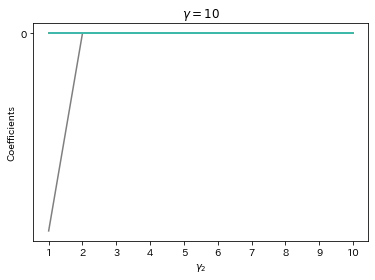

In [47]:
plt.title(r"$\gamma = 10$")
plt.xlabel(r"$\gamma_2$"); plt.ylabel("Coefficients")
plt.xticks(range(1, 11)); plt.yticks(range(-2, 3))
for j in range(d):
    plt.plot(gamma_2_seq, z[:, j], color=cycle[j])
plt.show()